# Applied Machine Learning - HW1 

Maxime TCHIBOZO (mt3390)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("fire_nrt_V1_96617.csv")
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


# 1 : Density Plots

## 1.1 Plotting Longitude vs. Latitude

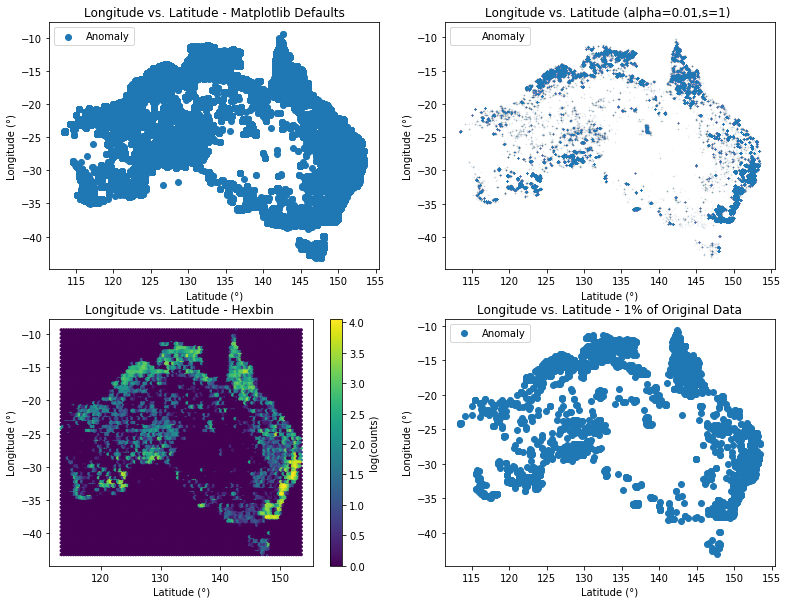

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(13, 10))
ax[0,0].scatter(df["longitude"],df["latitude"],label="Anomaly")
ax[0,0].legend(loc="upper left")
ax[0,0].set_xlabel("Latitude (°)")
ax[0,0].set_ylabel("Longitude (°)")
ax[0,0].title.set_text("Longitude vs. Latitude - Matplotlib Defaults")

ax[0,1].scatter(df["longitude"],df["latitude"],label="Anomaly",alpha=0.01,s=1)
ax[0,1].legend(loc="upper left")
ax[0,1].set_xlabel("Latitude (°)")
ax[0,1].set_ylabel("Longitude (°)")
ax[0,1].title.set_text("Longitude vs. Latitude (alpha=0.01,s=1) ")

hb = ax[1,0].hexbin(df["longitude"],df["latitude"], bins='log')
ax[1,0].set_xlabel("Latitude (°)")
ax[1,0].set_ylabel("Longitude (°)")
ax[1,0].title.set_text("Longitude vs. Latitude - Hexbin ")
cb = fig.colorbar(hb, ax=ax[1,0])
cb.set_label('log(counts)')

sample_df = df.sample(frac=0.01)
ax[1,1].scatter(sample_df["longitude"],sample_df["latitude"],label="Anomaly")
ax[1,1].legend(loc="upper left")
ax[1,1].set_xlabel("Latitude (°)")
ax[1,1].set_ylabel("Longitude (°)")
ax[1,1].title.set_text("Longitude vs. Latitude - 1% of Original Data")

## 1.2 Anomaly Areas

As the hexbin plot indicates, the regions with the highest concentration of anomalies are the South-East Coast (area surrounding Canberra), followed by the South-West Coast(area surrounding Esperance) . The third most anomaly-concentrated region is the North Coast region (area surrounding Darwin), which has a large surface of anomalies, but a lower concentration than the two other regions.

# 2 : Visualizing Class Membership

Text(0.5,1,'Brightness Temperature Histogram')

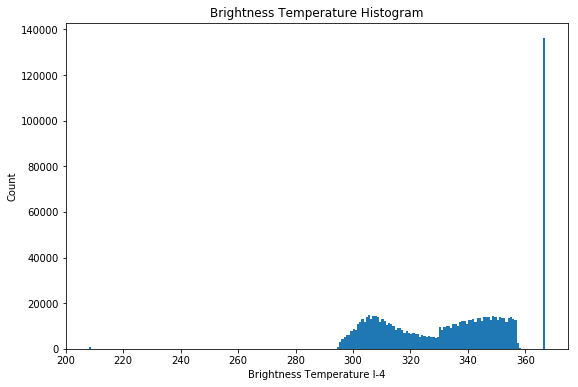

In [9]:
plt.figure(figsize=(9,6))
plt.hist(df["bright_ti4"],bins="auto")
plt.xlabel("Brightness Temperature I-4")
plt.ylabel("Count")
plt.title("Brightness Temperature Histogram")

In [13]:
sat_brightness = max(df["bright_ti4"])
sat_df = df.loc[df["bright_ti4"] == sat_brightness]
unsat_df = df.loc[df["bright_ti4"] != sat_brightness]

# 2 : Visualizing Class Membership

## 2.1 Plotting Saturated and Unsaturated Anomalies

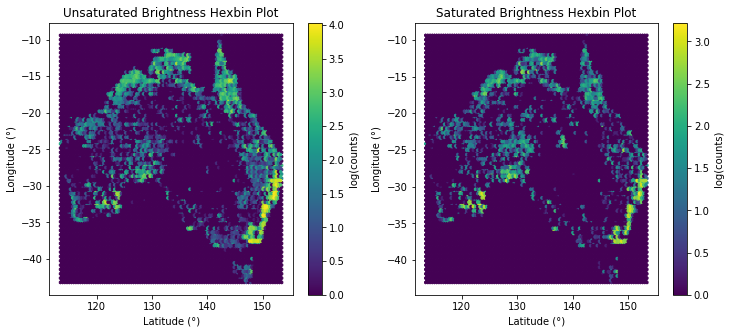

In [17]:
fig2, ax2 = plt.subplots(1, 2, figsize=(12,5))

hb21 = ax2[0].hexbin(unsat_df["longitude"],unsat_df["latitude"], bins='log')
ax2[0].set_xlabel("Latitude (°)")
ax2[0].set_ylabel("Longitude (°)")
ax2[0].title.set_text("Unsaturated Brightness Hexbin Plot")
cb21 = fig.colorbar(hb21, ax=ax2[0])
cb21.set_label('log(counts)')


hb22 = ax2[1].hexbin(sat_df["longitude"],sat_df["latitude"], bins='log')
ax2[1].set_xlabel("Latitude (°)")
ax2[1].set_ylabel("Longitude (°)")
ax2[1].title.set_text("Saturated Brightness Hexbin Plot")
cb22 = fig.colorbar(hb22, ax=ax2[1])
cb22.set_label('log(counts)')


At first glance, the distribution of the unsaturated and saturated point plots look the same. The anomalies are generally present in the same regions. However, the two distributions differ in density (concentration). For the most anomaly-concentrated regions in the unsaturated plot, there are approximately $exp(4) \approx 55$ anomalies at the same point, whereas for the most anomaly-concentrated regions of the unsaturated plot, there are approximately $exp(3.2) \approx 25 $ anomalies at the same point.

## 2.2 Changing the Order of Plotting

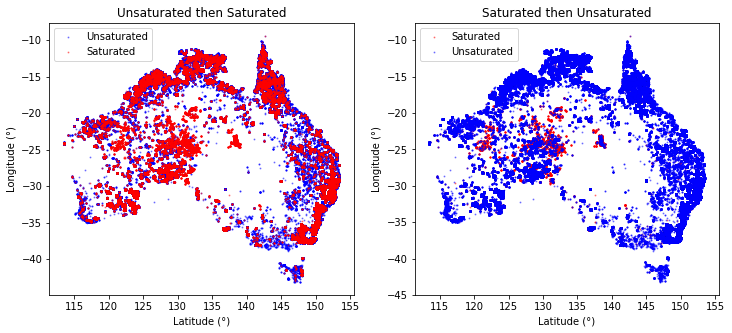

In [21]:
fig3, ax3 = plt.subplots(1,2, figsize=(12,5))

ax3[0].scatter(unsat_df["longitude"],unsat_df["latitude"],alpha=0.4,s=1,c="b",label="Unsaturated")
ax3[0].scatter(sat_df["longitude"],sat_df["latitude"],alpha=0.4,s=1,c="r",label="Saturated")
ax3[0].title.set_text("Unsaturated then Saturated")
ax3[0].set_xlabel("Latitude (°)")
ax3[0].set_ylabel("Longitude (°)")
ax3[0].legend(loc="upper left")

ax3[1].scatter(sat_df["longitude"],sat_df["latitude"],alpha=0.4,s=1,c="r",label="Saturated")
ax3[1].scatter(unsat_df["longitude"],unsat_df["latitude"],alpha=0.4,s=1,c="b",label="Unsaturated")
ax3[1].title.set_text("Saturated then Unsaturated")
ax3[1].set_xlabel("Latitude (°)")
ax3[1].set_ylabel("Longitude (°)")
ax3[1].legend(loc="upper left")


The choice of the order in which we display the saturated and unsaturated points has a significant impact on the output. When we plot the saturated points last, it seems that saturated and unsaturated points appear in equal proportion, and appear in the same regions. However, when we plot the unsaturated points last, it seems that there are very few saturated points, and that they only appear towards the Center-West of the map, whereas the unsaturated points appear everywhere. 

The plotting the same data in different orders can lead to different interpretations. In particular, if one were to see the "Saturated then Unsaturated" map first, they might assume that there are only few saturated points. This is not the case!

# 2.3 Comparing the distributions in a better way.

We can view this problem as a Machine Learning problem: given points that have a saturated or unsaturated label, how can we display the geographic distribution of these labels?

As we have seen in question 2.2, plotting one label then another may lead to an incorrect conclusion. What we could instead do would be to consider all the points, whether they be saturated or unsaturated, and apply a K-Nearest Neighbors algorithm to all the points to automatically color the map according to the most prevalent label at each location. 

The resulting map would simultaneously show the distributions of the saturated and unsaturated points, and pick the label of the most prevalent type when there is a conflict.

In [42]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = np.array(df[["longitude","latitude"]])
y = np.array([df["bright_ti4"].iloc[i]==sat_brightness for i in range(np.shape(df)[0])])

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.01) #We will plot 1% of the points
knn = KNeighborsClassifier(n_neighbors=5) #5 neighbors leads to good results
knn.fit(X_train, y_train)
print("accuracy: ", knn.score(X_test, y_test))
y_pred = knn.predict(X_test) 

accuracy:  0.8687650318937572


In [43]:
sat_predicted = []
unsat_predicted = []
for i in range(len(y_pred)):
    if y[i]== 1:
        sat_predicted.append(X_test[i])
    else:
        unsat_predicted.append(X_test[i])
sat_predicted = pd.DataFrame(sat_predicted)
unsat_predicted = pd.DataFrame(unsat_predicted)

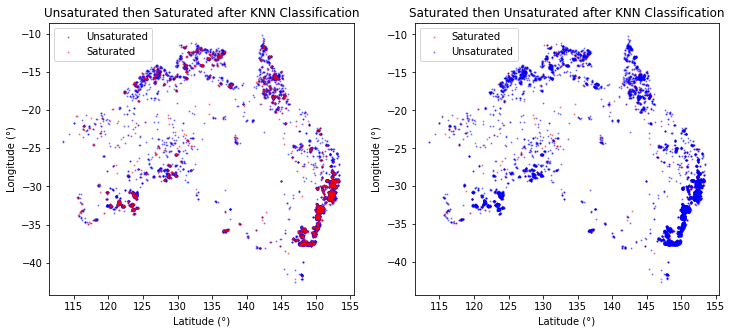

In [45]:
fig4, ax4 = plt.subplots(1,2, figsize=(12,5))

ax4[0].scatter(unsat_predicted[0],unsat_predicted[1],alpha=0.4,s=1,c="b",label="Unsaturated")
ax4[0].scatter(sat_predicted[0],sat_predicted[1],alpha=0.4,s=1,c="r",label="Saturated")
ax4[0].title.set_text("Unsaturated then Saturated after KNN Classification")
ax4[0].set_xlabel("Latitude (°)")
ax4[0].set_ylabel("Longitude (°)")
ax4[0].legend(loc="upper left")

ax4[1].scatter(sat_predicted[0],sat_predicted[1],alpha=0.4,s=1,c="r",label="Saturated")
ax4[1].scatter(unsat_predicted[0],unsat_predicted[1],alpha=0.4,s=1,c="b",label="Unsaturated")
ax4[1].title.set_text("Saturated then Unsaturated after KNN Classification")
ax4[1].set_xlabel("Latitude (°)")
ax4[1].set_ylabel("Longitude (°)")
ax4[1].legend(loc="upper left")



Once again, the order in which we plot our points has a significant impact on the output. However, we are now seeing punctual saturated points within the "Saturated then Unsaturated" points plot, we no longer have the red points appear  in only a small region. With this approach, both red and blue points appear everywhere in the graph. Please compare to graph 2.2 to observe the difference.

This, plus an alpha level (0.4) and the selection of a subset of the initial points (1% in our case - see train_test_split) means that we have a better understanding of the distribution of fires than in the part 2.2 plot - no matter the order in which we decide to plot.